Saving 5be963b246ac4055af3392d71f53efb2.webp to 5be963b246ac4055af3392d71f53efb2 (1).webp
لطفا ضریب بزرگ‌نمایی یا کوچک‌نمایی را وارد کنید: 2


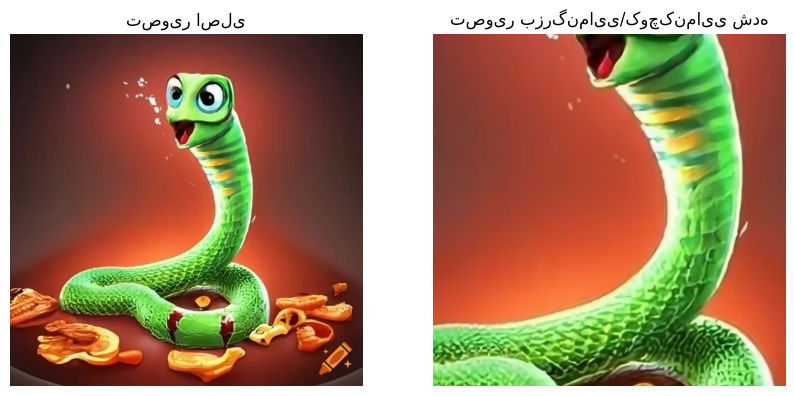

In [15]:
import numpy as np
from scipy.ndimage import zoom
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    else:
        out = img
    return out

# بارگذاری تصویر
uploaded = files.upload()

# انتخاب اولین تصویر بارگذاری شده
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

# تبدیل تصویر به آرایه NumPy
image_array = np.array(image)

# گرفتن ضریب بزرگ‌نمایی یا کوچک‌نمایی از کاربر
zoom_factor = float(input("لطفا ضریب بزرگ‌نمایی یا کوچک‌نمایی را وارد کنید: "))

# اعمال بزرگ‌نمایی یا کوچک‌نمایی
result = clipped_zoom(image_array, zoom_factor)

# نمایش تصویر اصلی و تصویر نتیجه
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("تصویر اصلی")
plt.imshow(image_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("تصویر بزرگ‌نمایی/کوچک‌نمایی شده")
plt.imshow(result)
plt.axis('off')

plt.show()